In [16]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


In [17]:
cat_data=[]
class_data=[]
for i in range(0,10):
    cat_data.append(train_data[train_labels==i])
    class_data.append(train_labels[train_labels==i])

In [18]:
from sklearn.linear_model import Perceptron,LogisticRegression
def classifier(data1,data2,label1,label2,test):
    data=np.concatenate((data1,data2),axis=0)
    label=np.concatenate((label1,label2),axis=0)
    lr = LogisticRegression(C=80)
    lr.fit(data,label)
    return lr.predict(test)

In [19]:
mat=np.zeros(1000)
accuracy=0
for i in range(0,10):
    for j in range(i+1,10):
        mat=np.vstack((mat,classifier(cat_data[i],cat_data[j],class_data[i],class_data[j],test_data)))
mat=np.delete(mat,0,axis=0).astype(int)
pred=[]
for i in range(0,1000):
    pred.append(np.argmax(np.bincount(mat[:,i])))
    if np.argmax(np.bincount(mat[:,i]))==test_labels[i]:
        accuracy=accuracy+1
print(accuracy/10)

90.1


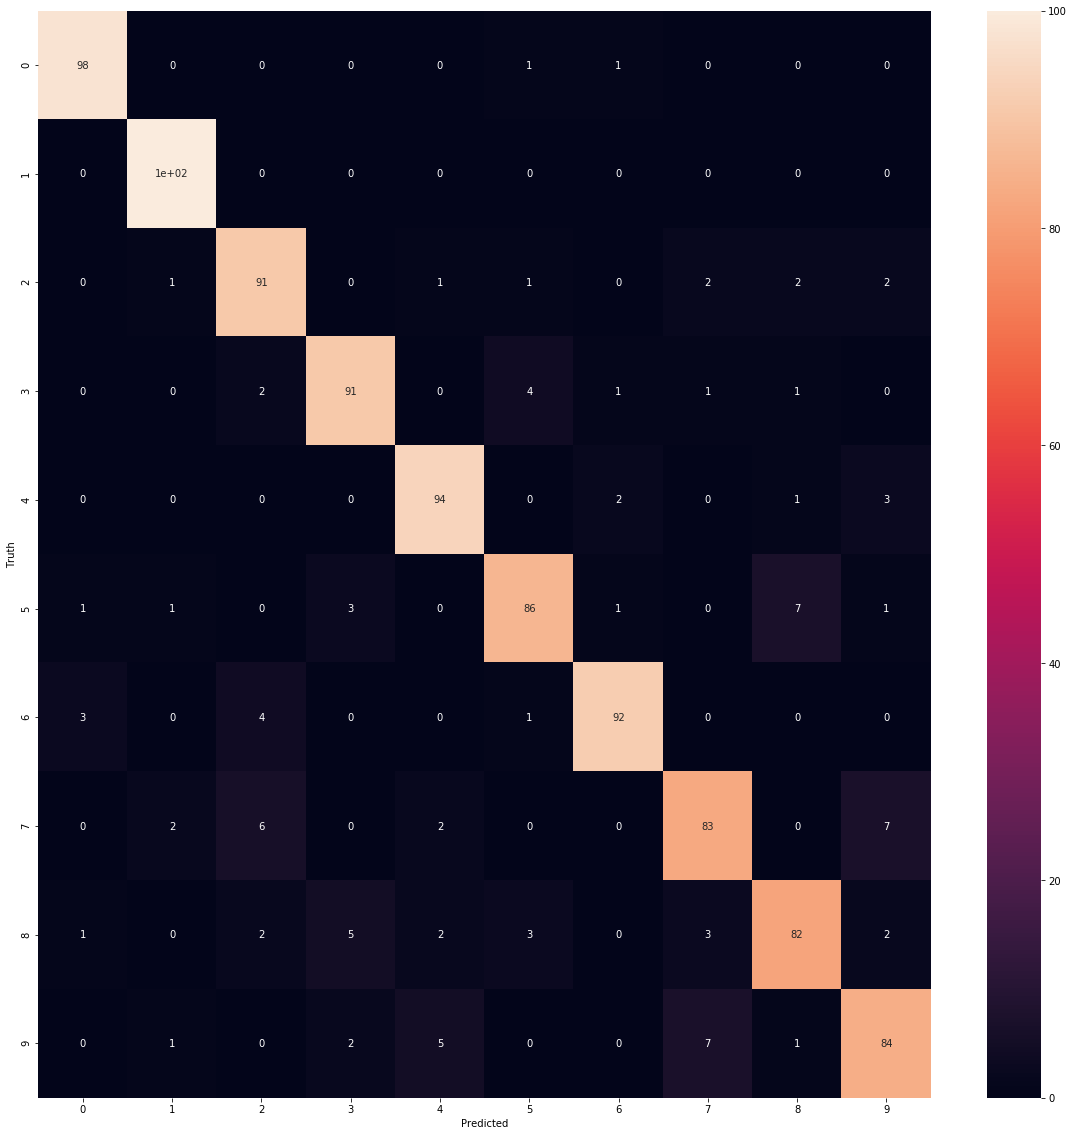

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(test_labels,np.array(pred))
plt.figure(figsize = (20,20))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('q3confusionmatrix.jpg')
plt.show()